# Random Forest Project 
## About Dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

DATA Source: IBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
163,21,F,HIGH,NORMAL,28.632,drugY
24,33,F,LOW,HIGH,33.486,drugY
60,38,F,LOW,NORMAL,29.875,drugY
161,57,F,HIGH,NORMAL,9.945,drugB
168,51,F,LOW,NORMAL,23.003,drugY
91,41,M,HIGH,NORMAL,15.156,drugY
23,48,F,LOW,HIGH,15.036,drugY
137,35,F,HIGH,HIGH,12.894,drugA
129,32,F,NORMAL,HIGH,7.477,drugX
92,29,F,HIGH,HIGH,29.450,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


## Categorical Features

Notice there are some columns as categorical

That means we need to transform them, so sklearn will be able to understand them.

In [6]:
df['Sex'] = df['Sex'].map({'M':1 , 'F':0})

In [7]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [8]:
df['BP'] = df['BP'].map({'NORMAL':0 , 'LOW':2 , 'HIGH':1})

In [9]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [10]:
df['Cholesterol'] =df['Cholesterol'].map({'HIGH':1 , 'NORMAL': 0})
#Normal = 0 , High = 1

In [11]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [12]:
# The Label 
df['Drug'] = df['Drug'].map({'drugA': 1 ,'drugB': 2 ,'drugC': 3 ,'drugX': 4 ,'drugY': 5 })


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [14]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,5
1,47,1,2,1,13.093,3
2,47,1,2,1,10.114,3
3,28,0,0,1,7.798,4
4,61,0,2,1,18.043,5


<AxesSubplot:>

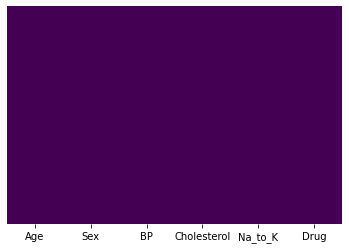

In [15]:
sns.heatmap(df.isnull(),yticklabels=False , cbar=False,cmap='viridis')

### There is no NaN Value in data and all the data is numerical now and ready to run on our model

<AxesSubplot:xlabel='Sex', ylabel='count'>

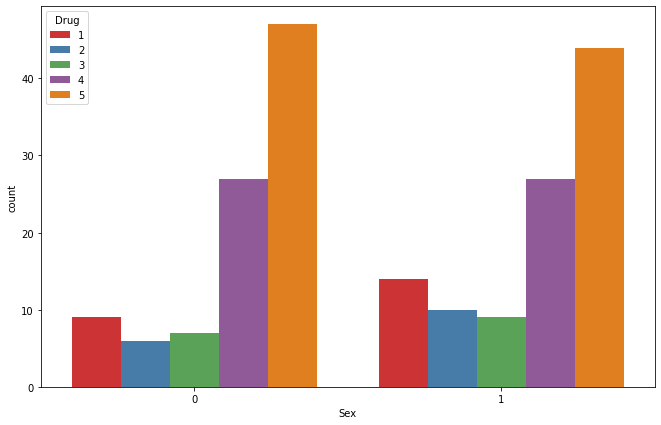

In [16]:
plt.figure(figsize=(11,7))
sns.countplot(x='Sex',hue='Drug',data=df,palette='Set1')

**In the above plot 
we can understand the sex Does not make a difference in the use of drugs**

<AxesSubplot:xlabel='BP', ylabel='count'>

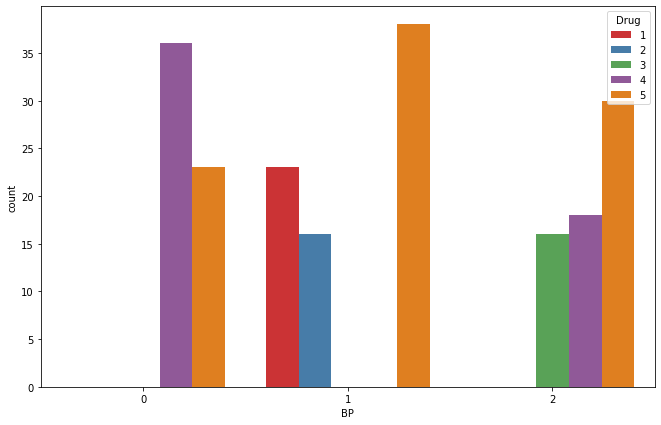

In [17]:
plt.figure(figsize=(11,7))
sns.countplot(x='BP',hue='Drug',data=df,palette='Set1')

In the above plot 
we can understand: 
* the people who has **Normal** Blood Pressure They only take DrugX and DrugY
* the people who has **High** Blood Pressure they take DrugA , DrugB and DrugY
* the people who has **Low** Blood Pressure they take DrugC , DrugX and DrugY

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

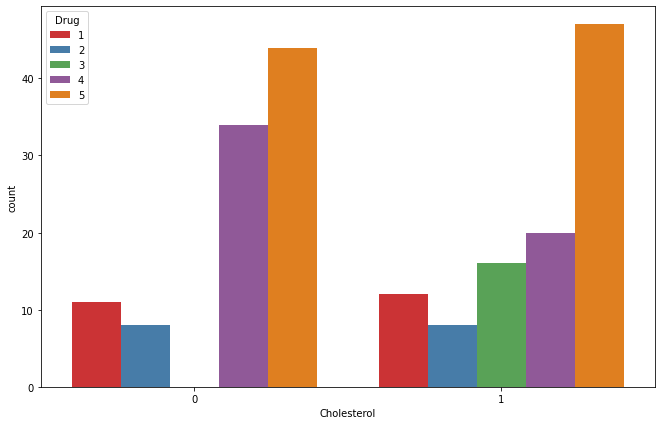

In [18]:
plt.figure(figsize=(11,7))
sns.countplot(x='Cholesterol',hue='Drug',data=df,palette='Set1')

In the above plot we can understand: 
The people who has **Normal** Cholestreol doesn't take DrugC at all.
While who has **High** Cholestreol take all Drugs

## Train Test Split

Now its time to split our data into a training set and a testing set!


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Drug',axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Training a Decision Tree Model

Let's start by training a single decision tree first

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [24]:
pred = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.99      0.98      0.98        60



[[ 8  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]


## Training the Random Forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=300)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation

In [30]:
predictions = rfc.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94         8
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.98      0.96      0.97        60
weighted avg       0.99      0.98      0.98        60



[[ 8  0  0  0  0]
 [ 1  4  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 16  0]
 [ 0  0  0  0 27]]
